**Introdução: Explorando o Universo das Séries de TV**

Bem-vindo a esta análise exploratória de dados (EDA) dedicada ao fascinante mundo das séries de TV. Os dados utilizados neste projeto foram adquiridos do Kaggle, proporcionando-nos uma visão detalhada e intrigante sobre esse vasto universo de entretenimento.

Ao longo desta EDA, buscaremos responder a algumas perguntas cativantes que iluminarão aspectos cruciais do cenário televisivo. Dentre essas questões, destacamos a busca pela média das classificações atribuídas, a identificação do gênero mais prevalente nas séries, a análise do ano que testemunhou o maior número de lançamentos e a revelação dos atores que frequentemente brilham nas telas.

Prepare-se para embarcar em uma jornada de descobertas, onde cada gráfico e cada número revelarão facetas únicas do panorama das séries de TV. Esta EDA promete não apenas oferecer respostas intrigantes, mas também inspirar novas perguntas sobre o fascinante universo televisivo que tanto cativa audiências ao redor do mundo. Vamos explorar juntos!

In [322]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

- **Nome das colunas**: Significados
  - Series Title: O título da série de TV.
  - Release Year: O ano de lançamento da série.
  - Runtime: A duração média de cada episódio da série em minutos.
  - Genre: O gênero ou gêneros aos quais a série pertence (por exemplo, Comédia, Crime, etc.).
  - Rating: A classificação média atribuída à série.
  - Cast: Os principais membros do elenco da série.
  - Synopsis: Uma breve descrição ou resumo do enredo da série.


In [323]:
df = pd.read_csv('TV Series.csv')

In [324]:
tem_duplicatas = df.duplicated()

In [325]:
#tem muitos valores duplicados
df[tem_duplicatas].shape

(39997, 7)

In [326]:
#dropando valores duplicados
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [327]:
df.head()

,Series Title,Release Year,Runtime,Genre,Rating,Cast,Synopsis
0,Wednesday,(2022– ),45 min,"Comedy, Crime, Fantasy",8.2,"Jenna Ortega, Hunter Doohan, Percy Hynes White...","Follows Wednesday Addams' years as a student, ..."
1,Yellowstone,(2018– ),60 min,"Drama, Western",8.7,"Kevin Costner, Luke Grimes, Kelly Reilly, Wes ...",A ranching family in Montana faces off against...
2,The White Lotus,(2021–2023),60 min,"Comedy, Drama",7.9,"Jennifer Coolidge, Jon Gries, F. Murray Abraha...","Set in a tropical resort, it follows the explo..."
3,1923,(2022–2023),60 min,"Drama, Western",8.6,"Harrison Ford, Helen Mirren, Brandon Sklenar, ...",The Duttons face a new set of challenges in th...
4,Jack Ryan,(2018– ),60 min,"Action, Drama, Thriller",8.0,"John Krasinski, Wendell Pierce, Michael Kelly,...","Up-and-coming CIA analyst, Jack Ryan, is thrus..."


transformando Release Year em datatime

In [328]:
df['Release Year'] = df['Release Year'].str.replace('–', ', ').str.replace('(', '').str.replace(')', '')

# Divida os anos em uma lista
df['Release Year'] = df['Release Year'].str.split(', ')

# Exploda a coluna 'Release Year' para criar uma nova linha para cada ano
df = df.explode('Release Year')

# Remova linhas onde 'Release Year' não é um número
df = df[pd.to_numeric(df['Release Year'], errors='coerce').notnull()]

# Transforme 'Release Year' em tipo datetime
df['Release Year'] = pd.to_datetime(df['Release Year'], format='%Y', errors='coerce')


In [329]:
df.head()

,Series Title,Release Year,Runtime,Genre,Rating,Cast,Synopsis
0,Wednesday,2022-01-01,45 min,"Comedy, Crime, Fantasy",8.2,"Jenna Ortega, Hunter Doohan, Percy Hynes White...","Follows Wednesday Addams' years as a student, ..."
1,Yellowstone,2018-01-01,60 min,"Drama, Western",8.7,"Kevin Costner, Luke Grimes, Kelly Reilly, Wes ...",A ranching family in Montana faces off against...
2,The White Lotus,2021-01-01,60 min,"Comedy, Drama",7.9,"Jennifer Coolidge, Jon Gries, F. Murray Abraha...","Set in a tropical resort, it follows the explo..."
2,The White Lotus,2023-01-01,60 min,"Comedy, Drama",7.9,"Jennifer Coolidge, Jon Gries, F. Murray Abraha...","Set in a tropical resort, it follows the explo..."
3,1923,2022-01-01,60 min,"Drama, Western",8.6,"Harrison Ford, Helen Mirren, Brandon Sklenar, ...",The Duttons face a new set of challenges in th...


transformando Rating em númerico

In [330]:
df['Rating'] = df['Rating'].replace(' min')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [331]:
# Dividindo os valores da coluna 'Genre' em listas
df['Genre'] = df['Genre'].str.split(', ')

# Dividindo os valores da coluna 'Cast' em listas
df['Cast'] = df['Cast'].str.split(', ')

# Expandindo as listas na coluna 'Genre' para criar múltiplas entradas
df = df.explode('Genre')

# Expandindo as listas na coluna 'Cast' para criar múltiplas entradas
df = df.explode('Cast')

Qual é a média de classificação (Rating) das séries no DataFrame?

In [332]:
mean_rating =df['Rating'].mean()
mean_rating

7.1974517096580675

Text(0.5, 0, 'Avaliação')

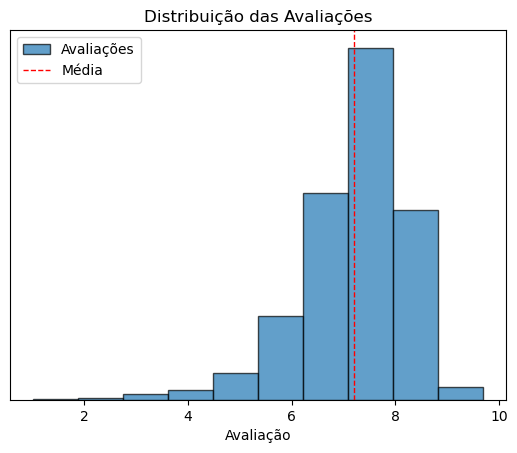

In [333]:
plt.hist(df['Rating'], bins=10, edgecolor='black', alpha=0.7, label='Avaliações')
plt.axvline(x=mean_rating, color='red', linestyle='dashed', linewidth=1, label='Média')
plt.yticks([])
plt.legend()
plt.title('Distribuição das Avaliações')
plt.xlabel('Avaliação')

In [334]:
df.head()

,Series Title,Release Year,Runtime,Genre,Rating,Cast,Synopsis
0,Wednesday,2022-01-01,45 min,Comedy,8.2,Jenna Ortega,"Follows Wednesday Addams' years as a student, ..."
0,Wednesday,2022-01-01,45 min,Comedy,8.2,Hunter Doohan,"Follows Wednesday Addams' years as a student, ..."
0,Wednesday,2022-01-01,45 min,Comedy,8.2,Percy Hynes White,"Follows Wednesday Addams' years as a student, ..."
0,Wednesday,2022-01-01,45 min,Comedy,8.2,Emma Myers,"Follows Wednesday Addams' years as a student, ..."
0,Wednesday,2022-01-01,45 min,Crime,8.2,Jenna Ortega,"Follows Wednesday Addams' years as a student, ..."


Qual é o gênero mais comum entre as séries listadas?

In [335]:
genero_comum = df['Genre'].value_counts()
genero_comum = genero_comum.to_frame()
genero_comum

,count
Genre,
Drama,25708
Comedy,22327
Action,10399
Crime,9783
Adventure,9273
Animation,9076
Family,5500
Romance,5371
Mystery,5137


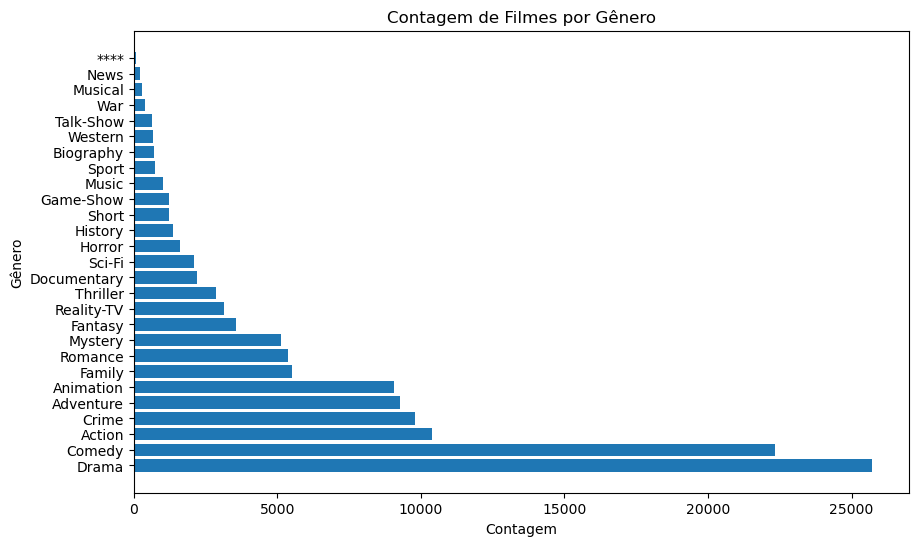

In [336]:
plt.figure(figsize=(10, 6)) 
plt.barh(genero_comum.index, genero_comum['count']) 

plt.xlabel('Contagem')
plt.ylabel('Gênero')
plt.title('Contagem de Filmes por Gênero')

plt.show()


Qual é o ano que mais teve lançamento de séries no DataFrame?

In [337]:
df.head()

,Series Title,Release Year,Runtime,Genre,Rating,Cast,Synopsis
0,Wednesday,2022-01-01,45 min,Comedy,8.2,Jenna Ortega,"Follows Wednesday Addams' years as a student, ..."
0,Wednesday,2022-01-01,45 min,Comedy,8.2,Hunter Doohan,"Follows Wednesday Addams' years as a student, ..."
0,Wednesday,2022-01-01,45 min,Comedy,8.2,Percy Hynes White,"Follows Wednesday Addams' years as a student, ..."
0,Wednesday,2022-01-01,45 min,Comedy,8.2,Emma Myers,"Follows Wednesday Addams' years as a student, ..."
0,Wednesday,2022-01-01,45 min,Crime,8.2,Jenna Ortega,"Follows Wednesday Addams' years as a student, ..."


In [338]:
series_por_ano = df['Release Year'].value_counts()
ano_com_mais_series = series_por_ano.idxmax().year
n_series = series_por_ano.max()
print(f'o ano que mais teve lançamento de séries {ano_com_mais_series} com {n_series} lançadas')

o ano que mais teve lançamento de séries 2022 com 11542 lançadas


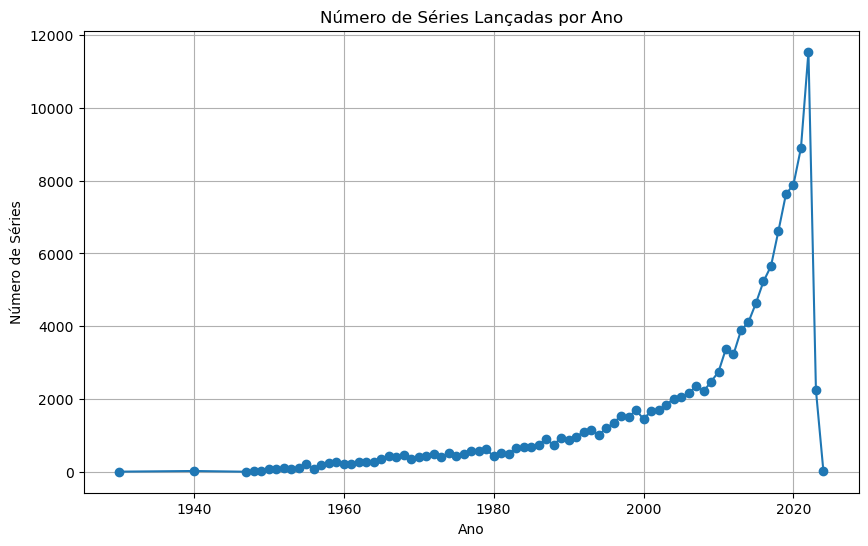

In [339]:
# Agrupe os dados por ano e conte o número de séries lançadas em cada ano
series_por_ano = df.groupby('Release Year')['Series Title'].count()

# Crie um gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(series_por_ano.index, series_por_ano.values, marker='o')
plt.title('Número de Séries Lançadas por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Séries')
plt.grid(True)
plt.show()

Quais são os três principais atores/atrizes com base no número de séries em que aparecem?

In [340]:
principais = df['Cast'].value_counts().to_frame()
principais

,count
Cast,
Frank Welker,186
Grey Griffin,159
Tom Kenny,142
Jeff Bennett,135
Dee Bradley Baker,105
...,...
Lindsay Glazer,1
Elma Mbadiwe,1
Tomi Ojo,1


<BarContainer object of 3 artists>

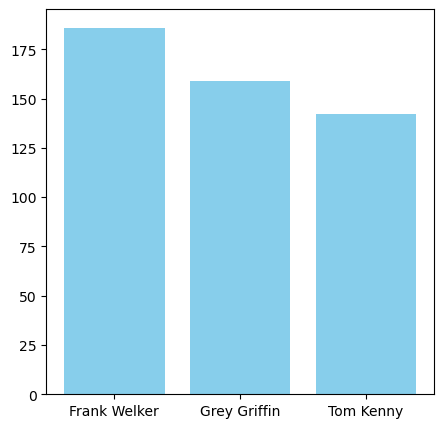

In [341]:
plt.figure(figsize=(5,5))
plt.bar(principais.index[:3], principais['count'][:3],color='skyblue')

Após uma análise exploratória de dados (EDA), descobrimos insights intrigantes sobre as séries examinadas. A classificação média geral das séries é de 7, indicando que, em média, as séries são bem avaliadas. Notavelmente, o gênero mais comum entre as séries analisadas é Drama, seguido por Comédia e Ação. Além disso, concluímos que o ano de 2022 teve o maior número de lançamentos de séries, com um total impressionante de 11.542 novos títulos.

Ao identificar os atores que mais aparecem nas séries, destacamos três figuras proeminentes. Frank Welker lidera a lista com 186 aparições, seguido por Grey Griffin com 168 e Tom Kenny com 154. Essas descobertas fornecem insights valiosos sobre as tendências gerais das séries analisadas.

Essa EDA não apenas oferece uma visão abrangente do panorama das séries, mas também destaca aspectos notáveis, como a qualidade média das avaliações, os gêneros predominantes e os atores mais frequentes. Espero que essas informações sejam úteis e esclarecedoras para qualquer análise futura. 